<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Navigation" data-toc-modified-id="Navigation-1">Navigation</a></span><ul class="toc-item"><li><span><a href="#1.-Start-the-Environment" data-toc-modified-id="1.-Start-the-Environment-1.1">1. Start the Environment</a></span></li><li><span><a href="#2.-Examine-the-State-and-Action-Spaces" data-toc-modified-id="2.-Examine-the-State-and-Action-Spaces-1.2">2. Examine the State and Action Spaces</a></span></li><li><span><a href="#3.-Take-Random-Actions-in-the-Environment" data-toc-modified-id="3.-Take-Random-Actions-in-the-Environment-1.3">3. Take Random Actions in the Environment</a></span></li><li><span><a href="#4.-It's-Your-Turn!" data-toc-modified-id="4.-It's-Your-Turn!-1.4">4. It's Your Turn!</a></span><ul class="toc-item"><li><span><a href="#4.a.-First-watch-an-untrained-agent" data-toc-modified-id="4.a.-First-watch-an-untrained-agent-1.4.1">4.a. First watch an untrained agent</a></span></li><li><span><a href="#4.b.-Train-the-agent-with-DQN" data-toc-modified-id="4.b.-Train-the-agent-with-DQN-1.4.2">4.b. Train the agent with DQN</a></span></li></ul></li><li><span><a href="#5.-Runs-Summary" data-toc-modified-id="5.-Runs-Summary-1.5">5. Runs Summary</a></span></li><li><span><a href="#6.-Runs-detail" data-toc-modified-id="6.-Runs-detail-1.6">6. Runs detail</a></span><ul class="toc-item"><li><span><a href="#Run-7" data-toc-modified-id="Run-7-1.6.1">Run 7</a></span></li><li><span><a href="#Run-6" data-toc-modified-id="Run-6-1.6.2">Run 6</a></span></li><li><span><a href="#Run-5" data-toc-modified-id="Run-5-1.6.3">Run 5</a></span></li><li><span><a href="#Run-4" data-toc-modified-id="Run-4-1.6.4">Run 4</a></span></li><li><span><a href="#Run-3" data-toc-modified-id="Run-3-1.6.5">Run 3</a></span></li><li><span><a href="#Run-2" data-toc-modified-id="Run-2-1.6.6">Run 2</a></span></li><li><span><a href="#Run-1" data-toc-modified-id="Run-1-1.6.7">Run 1</a></span></li></ul></li><li><span><a href="#7.-Watch-the-trained-Agent" data-toc-modified-id="7.-Watch-the-trained-Agent-1.7">7. Watch the trained Agent</a></span></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-2">Appendix</a></span></li></ul></div>

# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

## 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
import torch

from collections import deque
import matplotlib.pyplot as plt

%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
banapath = "G:/DeepLearning/Udacity/deep-reinforcement-learning/p1_navigation/Banana/Banana.exe"

In [4]:
env = UnityEnvironment(file_name=banapath)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [10]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


## 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [7]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [8]:
env.close()

## 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### 4.a. First watch an untrained agent

In [9]:
from dqn_agent import Agent

agent = Agent(state_size=37, action_size=4, seed=0, fc1_units = 64, fc2_units = 64)
score = 0

# watch an untrained agent
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]
for j in range(200):
    action = agent.act(state).astype(int)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


In [10]:
env.close()

### 4.b. Train the agent with DQN

In [11]:
env = UnityEnvironment(file_name=banapath)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [12]:
del agent

In [13]:
from dqn_agent import Agent
agent = Agent(state_size=37, action_size=4, seed=0, fc1_units = 80, fc2_units = 70)

In [14]:
print(agent.qnetwork_local)

QNetwork(
  (fc1): Linear(in_features=37, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=70, bias=True)
  (fc3): Linear(in_features=70, out_features=4, bias=True)
)


In [15]:
def dqn(n_episodes=2000, max_t=1000, eps_start=0.990, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_avg = []
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start 
    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode = True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps).astype(int)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        scores_avg.append(np.mean(scores_window)) # save average of window
        
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
            
    return scores, scores_avg 

In [16]:
scores, scores_avg = dqn(n_episodes=2000, eps_decay=0.95, eps_end=0.03)

Episode 100	Average Score: 11.90
Episode 109	Average Score: 13.01
Environment solved in 9 episodes!	Average Score: 13.01


QNetwork(
  (fc1): Linear(in_features=37, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=70, bias=True)
  (fc3): Linear(in_features=70, out_features=4, bias=True)
)


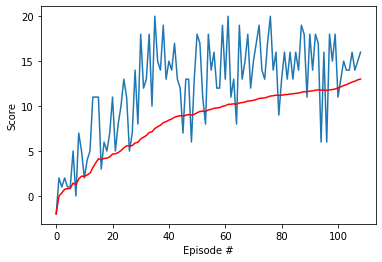

In [17]:
print(agent.qnetwork_local)
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(scores_avg, color="red")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [18]:
env.close()

## 5. Runs Summary

<img src="images/run_results.PNG" align="left"/>

## 6. Runs detail

### Run 7
```
checkpoint_7.pth

eps_start=0.990, eps_end=0.03, eps_decay=0.95

Episode 100	Average Score: 11.90
Episode 109	Average Score: 13.01
Environment solved in 9 episodes!	Average Score: 13.01

QNetwork(
  (fc1): Linear(in_features=37, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=70, bias=True)
  (fc3): Linear(in_features=70, out_features=4, bias=True)
)
```
<img src="images/run_7.PNG" align="left"/>

### Run 6
```
checkpoint_6.pth

eps_start=0.990, eps_end=0.02, eps_decay=0.97

Episode 100	Average Score: 5.19
Episode 200	Average Score: 9.930
Episode 300	Average Score: 12.35
Episode 316	Average Score: 13.06
Environment solved in 216 episodes!	Average Score: 13.06

QNetwork(
  (fc1): Linear(in_features=37, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=70, bias=True)
  (fc3): Linear(in_features=70, out_features=4, bias=True)
)
```
<img src="images/run_6a.PNG" align="left"/>

### Run 5
```
checkpoint_5.pth

eps_start=0.990, eps_end=0.01, eps_decay=0.995

Episode 100	Average Score: 1.36
Episode 200	Average Score: 4.81
Episode 300	Average Score: 8.15
Episode 400	Average Score: 9.21
Episode 483	Average Score: 13.06
Environment solved in 383 episodes!	Average Score: 13.06

QNetwork(
  (fc1): Linear(in_features=37, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=70, bias=True)
  (fc3): Linear(in_features=70, out_features=4, bias=True)
)
```
<img src="images/run_5.PNG" align="left"/>

### Run 4
```
checkpoint_4.pth

eps_start=0.990, eps_end=0.01, eps_decay=0.995

Episode 100	Average Score: 0.04
Episode 200	Average Score: 1.721
Episode 300	Average Score: 6.04
Episode 400	Average Score: 9.63
Episode 500	Average Score: 12.67
Episode 537	Average Score: 13.02
Environment solved in 437 episodes!	Average Score: 13.02

QNetwork(
  (fc1): Linear(in_features=37, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=4, bias=True)
)
```
<img src="images/run_4.PNG" align="left"/>

### Run 3
```
checkpoint_3.pth

eps_start=1.0, eps_end=0.01, eps_decay=0.995

Episode 100	Average Score: 0.47
Episode 200	Average Score: 2.73
Episode 300	Average Score: 6.52
Episode 400	Average Score: 9.32
Episode 500	Average Score: 12.03
Episode 526	Average Score: 13.04
Environment solved in 426 episodes!	Average Score: 13.04

QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=4, bias=True)
)
```
<img src="images/run_3.PNG" align="left"/>

### Run 2
```
checkpoint_2.pth

eps_start=1.0, eps_end=0.01, eps_decay=0.995

Episode 100	Average Score: 0.12
Episode 200	Average Score: 3.36
Episode 300	Average Score: 6.55
Episode 400	Average Score: 10.32
Episode 500	Average Score: 12.32
Episode 579	Average Score: 13.04
Environment solved in 479 episodes!	Average Score: 13.04

QNetwork(
  (fc1): Linear(in_features=37, out_features=96, bias=True)
  (fc2): Linear(in_features=96, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)
```
<img src="images/run_2.PNG" align="left"/>

### Run 1
```
checkpoint_1.pth

eps_start=1.0, eps_end=0.01, eps_decay=0.995

Episode 100	Average Score: 1.17
Episode 200	Average Score: 4.46
Episode 300	Average Score: 7.39
Episode 400	Average Score: 10.43
Episode 500	Average Score: 12.30
Episode 568	Average Score: 13.03
Environment solved in 468 episodes!	Average Score: 13.03

QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)
```
<img src="images/run_1.PNG" align="left"/>

## 7. Watch the trained Agent

In [19]:
env = UnityEnvironment(file_name=banapath)

In [5]:
from dqn_agent import Agent
agent = Agent(state_size=37, action_size=4, seed=0, fc1_units = 80, fc2_units = 70)

In [6]:
print(agent.qnetwork_local)

QNetwork(
  (fc1): Linear(in_features=37, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=70, bias=True)
  (fc3): Linear(in_features=70, out_features=4, bias=True)
)


In [7]:
chkpoint_file = "checkpoint.pth"

In [8]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load(chkpoint_file, 
                                                map_location=lambda storage, loc: storage))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [59]:
env_info = env.reset(train_mode=False)[brain_name] 
state = env_info.vector_observations[0] 

num_episodes = 10
scores = []
scores_avg = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] 
    state = env_info.vector_observations[0]            
    score = 0                                          
    while True:
        action = agent.act(state, eps=0).astype(int)   
        env_info = env.step(action)[brain_name]        
        next_state = env_info.vector_observations[0]   
        reward = env_info.rewards[0]                   
        done = env_info.local_done[0]                  

        score += reward                                
        state = next_state                             
        if done:                                       
            scores.append(score)
            scores_avg.append(np.mean(scores)) 
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

Episode 1	Average Score: 11.00
Episode 2	Average Score: 14.50
Episode 3	Average Score: 15.67
Episode 4	Average Score: 16.00
Episode 5	Average Score: 17.80
Episode 6	Average Score: 18.00
Episode 7	Average Score: 16.00
Episode 8	Average Score: 15.12
Episode 9	Average Score: 15.56
Episode 10	Average Score: 15.70


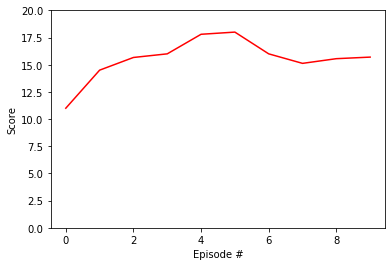

In [60]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(scores)), scores_avg, color="red")
plt.ylabel('Score')
plt.xlabel('Episode #')
ax.set_ylim(ymin=0, ymax = 20)
plt.show()

With agent trained on run 6:
```
Episode 1	Average Score: 11.00
Episode 2	Average Score: 14.50
Episode 3	Average Score: 15.67
Episode 4	Average Score: 16.00
Episode 5	Average Score: 17.80
Episode 6	Average Score: 18.00
Episode 7	Average Score: 16.00
Episode 8	Average Score: 15.12
Episode 9	Average Score: 15.56
Episode 10	Average Score: 15.70
```
<img src="images/run_6_test_1.PNG" align="left"/>

With agent trained on run 6:
```
Episode 1	Average Score: 17.00
Episode 2	Average Score: 18.50
Episode 3	Average Score: 15.33
Episode 4	Average Score: 12.50
Episode 5	Average Score: 13.00
Episode 6	Average Score: 14.17
Episode 7	Average Score: 15.14
Episode 8	Average Score: 14.88
Episode 9	Average Score: 15.33
Episode 10	Average Score: 15.30
```
<img src="images/run_6_test.PNG" align="left"/>

With agent trained on run 7:
```
Episode 1	Average Score: 22.00
Episode 2	Average Score: 12.00
Episode 3	Average Score: 9.33
Episode 4	Average Score: 10.75
Episode 5	Average Score: 11.00
Episode 6	Average Score: 11.33
Episode 7	Average Score: 12.43
Episode 8	Average Score: 13.00
Episode 9	Average Score: 13.11
Episode 10	Average Score: 13.60
```
<img src="images/run_7_test.PNG" align="left"/>

With agent trained on run 7:
```
Episode 1	Average Score: 6.00
Episode 2	Average Score: 11.50
Episode 3	Average Score: 8.67
Episode 4	Average Score: 10.75
Episode 5	Average Score: 11.60
Episode 6	Average Score: 11.33
Episode 7	Average Score: 12.00
Episode 8	Average Score: 11.75
Episode 9	Average Score: 12.56
Episode 10	Average Score: 13.80
```
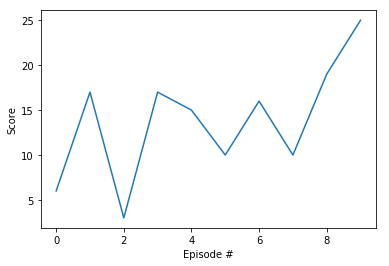

With agent trained on run 1:
```
Episode 1	Average Score: 17.00
Episode 2	Average Score: 13.50
Episode 3	Average Score: 12.00
Episode 4	Average Score: 12.25
Episode 5	Average Score: 13.40
Episode 6	Average Score: 12.00
Episode 7	Average Score: 10.71
Episode 8	Average Score: 9.50
Episode 9	Average Score: 10.00
Episode 10	Average Score: 9.10
```
<img src="images/run_1_test.PNG" align="left"/>

With agent trained on run 5:
```
Episode 1	Average Score: 15.00
Episode 2	Average Score: 16.00
Episode 3	Average Score: 12.00
Episode 4	Average Score: 11.00
Episode 5	Average Score: 12.00
Episode 6	Average Score: 10.50
Episode 7	Average Score: 9.43
Episode 8	Average Score: 8.88
Episode 9	Average Score: 9.33
Episode 10	Average Score: 9.60
```
<img src="images/run_5_test.PNG" align="left"/>

In [24]:
env_info = env.reset(train_mode=False)[brain_name] 
state = env_info.vector_observations[0]            
score = 0   
scores = []
while True:
    action = agent.act(state).astype(int)                  
    env_info = env.step(action)[brain_name]        
    next_state = env_info.vector_observations[0]   
    reward = env_info.rewards[0]                   
    done = env_info.local_done[0]                  
    score += reward                                
    scores.append(score)
    state = next_state                             
    if done:                                       
        break
    
print("Score: {}".format(score))

Score: 17.0


In [12]:
env_info = env.reset(train_mode=False)[brain_name] 
state = env_info.vector_observations[0]            
score = 0   
scores = []
for i_episode in range(1, 1001):
    action = agent.act(state).astype(int)                  
    env_info = env.step(action)[brain_name]        
    next_state = env_info.vector_observations[0]   
    reward = env_info.rewards[0]                   
    done = env_info.local_done[0]                  
    score += reward   
    scores.append(score)
    state = next_state                             
    if done:                                       
        break
    
print("Score: {}".format(score))

Score: 19.0


In [14]:
env.close()

# Appendix

In [26]:
%%javascript

// Sourced from http://nbviewer.jupyter.org/gist/minrk/5d0946d39d511d9e0b5a

$("#renumber-button").parent().remove();

function renumber() {
    // renumber cells in order
    var i=1;
    IPython.notebook.get_cells().map(function (cell) {
        if (cell.cell_type == 'code') {
            // set the input prompt
            cell.set_input_prompt(i);
            // set the output prompt (in two places)
            cell.output_area.outputs.map(function (output) {
                if (output.output_type == 'execute_result') {
                    output.execution_count = i;
                    cell.element.find(".output_prompt").text('Out[' + i + ']:');
                }
            });
            i += 1;
        }
    });
}

IPython.toolbar.add_buttons_group([{
  'label'   : 'Renumber',
  'icon'    : 'fa-list-ol',
  'callback': renumber,
  'id'      : 'renumber-button'
}]);

<IPython.core.display.Javascript object>